<h1>Assignment 2</h1>
<ul>
    <li>Name: Duc Minh Nguyen</li>
    <li>Student ID: 203009140</li>
    <li>Mail: ducx9140@mylaurier.ca</li>
</ul>

In [265]:
import pandas as pd
import numpy as np
import  cv2 
import matplotlib.pyplot as plt

<h1>Task 1</h1>

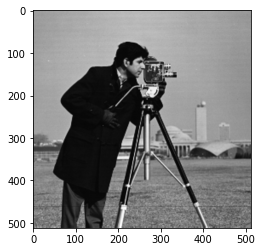

In [266]:
# Noisy image, uncomment to run this
# image = cv2.imread('download.jpg')

# Cameraman image, uncomment to run
image = cv2.imread('cameraman.tif')
plt.imshow(image)

<h2>Task 1.A - Average Smoothing Filter</h2>

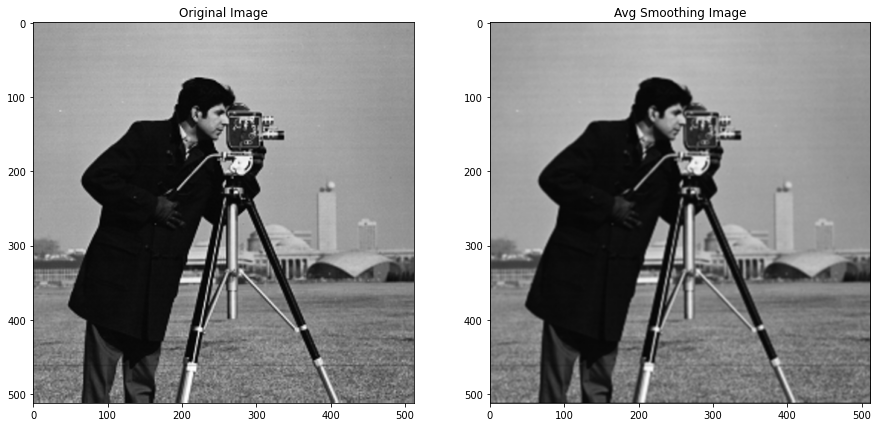

In [267]:
def average_smoothing_filter(img, filter):
    # Initialize an empty image of the same size for the output
    output = np.zeros_like(img)
    
    # Define the filter dimensions
    filter_height = len(filter)
    filter_width = len(filter[0])
    pad_height = filter_height // 2
    pad_width = filter_width // 2
    
    # Pad the image
    padded_img = np.pad(img, ((pad_height, pad_height), (pad_width, pad_width), (0, 0)), mode='constant')
    
    # Loop over image dimensions
    for c in range(img.shape[2]):  # This loop iterates over the channels
        for h in range(img.shape[0]):
            for w in range(img.shape[1]):
                temp_val = 0
                for k in range(filter_height):
                    for l in range(filter_width):
                        temp_val += filter[k][l] * padded_img[h + k][w + l][c]
                output[h][w][c] = int(temp_val)
                
    return output

# Define the average filter
avg_filter = [
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
]

# Apply the filter
output_avg_smooth = average_smoothing_filter(image, avg_filter)

# Saving image
cv2.imwrite("./output/t1a.tif", output_avg_smooth)

# Display the result
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1), plt.imshow(image), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(output_avg_smooth.astype('uint8')), plt.title('Avg Smoothing Image')
plt.show()

<h2>Task 1.B - Gaussian Smoothing Filter</h2>

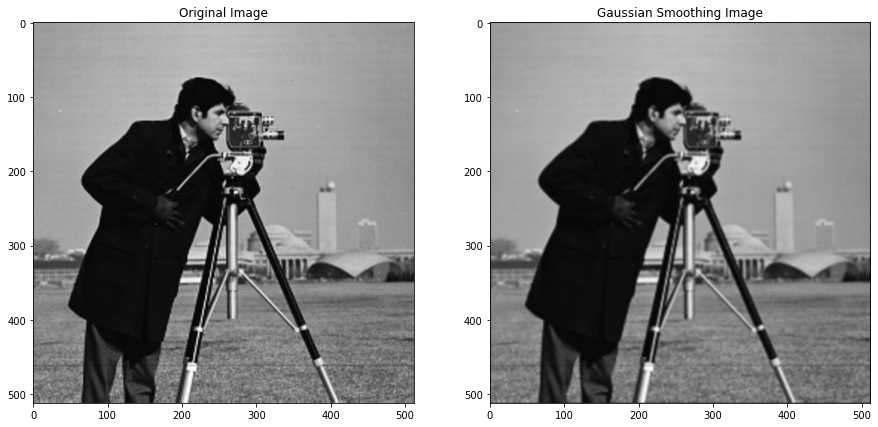

In [268]:
def gaussian_filter(size = 7 , sigma = 1):
    gauss_filter = np.zeros((size,size))

    center = (size - 1) / 2
    coefficient = 1 / (2 * np.pi * sigma**2)

    total = 0
    for x in range(size):
        for y in range(size):
            distance_squared = (x - center)**2 + (y - center)**2
            gauss_filter[x][y] = coefficient * np.exp(-distance_squared / (2 * sigma**2))
            total += gauss_filter[x][y]

    # normalize
    for x in range(size):
        for y in range(size):
            gauss_filter[x][y] /= total

    return gauss_filter

def convolve(image, filter):
    # ih - image height, iw - image width
    ih, iw, channels = image.shape

    # fh - filter_height, fw - filter width
    fh, fw = filter.shape
    
    # Initialize output array
    output = np.zeros_like(image)
    
    for c in range(channels):
        # Pad the image
        padded_img = np.pad(image[:,:,c], ((fh // 2, fh // 2), (fw // 2, fw // 2)), mode='constant')
        
        for i in range(ih):
            for j in range(iw):
                output[i, j, c] = np.sum(padded_img[i:i+fh, j:j+fw] * filter)
    
    return output


gaussianFilter = gaussian_filter(size=7, sigma=1)
output_gaussian = convolve(image, gaussianFilter)

# Saving image
cv2.imwrite("./output/t1b.tif", output_gaussian)

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1), plt.imshow(image), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(output_gaussian.astype('uint8')), plt.title('Gaussian Smoothing Image')
plt.show()

<h2>Task 1.C - Sobel Sharpening Filter</h2>

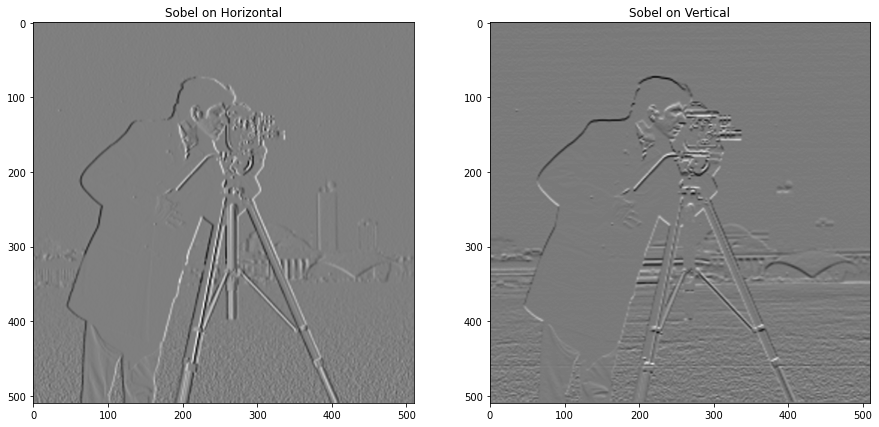

In [269]:
def convolveA(image, filter):
    i_rows, i_cols = image.shape
    k_rows, k_cols = filter.shape

    # the result will have the same number of channels as the input image
    result = np.zeros((i_rows - k_rows + 1, i_cols - k_cols + 1))
    
    for i in range(i_rows - k_rows + 1):
        for j in range(i_cols - k_cols + 1):
            for m in range(k_rows):
                for n in range(k_cols):
                    result[i][j] += image[i + m][j + n] * filter[m][n]
    
    return result


def sobel_filter(image):
    # Sobel-X and Sobel-Y filter
    Gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    Gy = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    
    # Get the convolved results
    sobel_x = convolveA(image, Gx)
    sobel_y = convolveA(image, Gy)
    
    return sobel_x, sobel_y

# Converting the image to gray scale
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imgX, imgY = sobel_filter(grayscale_image)

# Saving image
cv2.imwrite("./output/t1cX.tif", imgX)
cv2.imwrite("./output/t1cY.tif", imgY)

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1), plt.imshow(imgX ,cmap ='gray'), plt.title('Sobel on Horizontal')
plt.subplot(1, 2, 2), plt.imshow(imgY,cmap ='gray'), plt.title('Sobel on Vertical')
plt.show()

<h1>Task 2</h1>

<h2>Task 2.A - Average Smoothing Filter With OpenCV</h2>

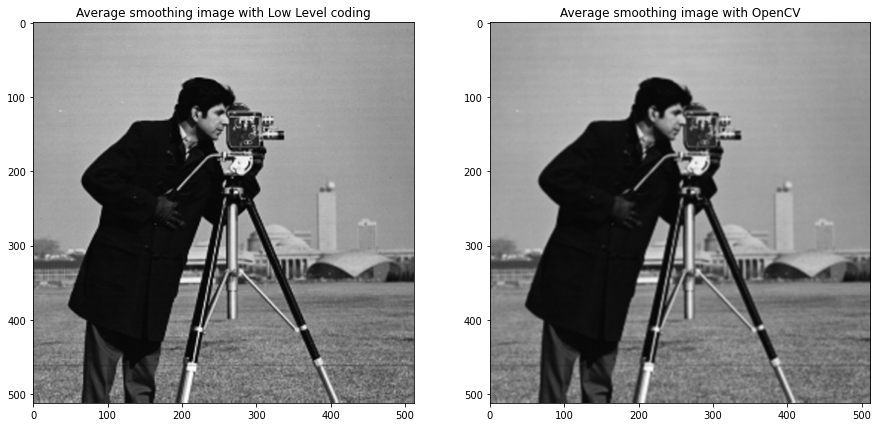

In [270]:
# Performing Avg Smoothing Filter 
blur = cv2.blur(image,(3,3))

# Saving image
cv2.imwrite("./output/t2a.tif", blur)

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1), plt.imshow(image), plt.title('Average smoothing image with Low Level coding')
plt.subplot(1, 2, 2), plt.imshow(blur.astype('uint8')), plt.title('Average smoothing image with OpenCV')
plt.show()

<h2>Task 2.B - Gaussian Smoothing filter With OpenCV </h2>

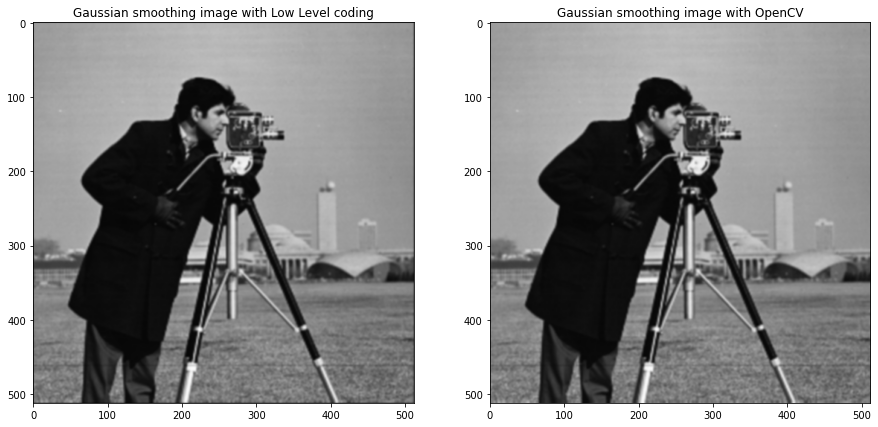

In [271]:
# image, (size x size), sigma
gaussianBlur = cv2.GaussianBlur(image, (7,7), 1) 

# Saving image
cv2.imwrite("./output/t2b.tif", gaussianBlur)

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1), plt.imshow(output_gaussian), plt.title('Gaussian smoothing image with Low Level coding')
plt.subplot(1, 2, 2), plt.imshow(gaussianBlur.astype('uint8')), plt.title('Gaussian smoothing image with OpenCV')
plt.show()

<h2>Task 2.C - Sobel Shaperning Filter with OpenCV</h2>

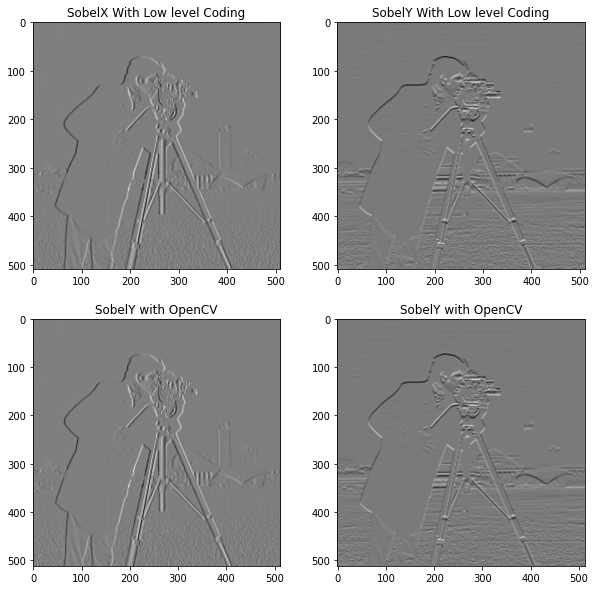

In [272]:
# Using the grayscale image
sobelX = cv2.Sobel(grayscale_image,cv2.CV_64F,1,0,ksize=3)
sobelY = cv2.Sobel(grayscale_image,cv2.CV_64F,0,1,ksize=3)

cv2.imwrite("./output/t2cX.tif", sobelX)
cv2.imwrite("./output/t2cY.tif", sobelY)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1), plt.imshow(imgX, cmap = 'gray'), plt.title('SobelX With Low level Coding')
plt.subplot(2, 2, 2), plt.imshow(imgY, cmap = 'gray'), plt.title('SobelY With Low level Coding')
plt.subplot(2, 2, 3), plt.imshow(sobelX, cmap = 'gray'), plt.title('SobelY with OpenCV')
plt.subplot(2, 2, 4), plt.imshow(sobelY, cmap = 'gray'), plt.title('SobelY with OpenCV')
plt.show()

<h1>Task 3</h1>

<h2>Task 3.A  - the Marr-Hildreth edge detection (Laplacian of Gaussian) </h2>

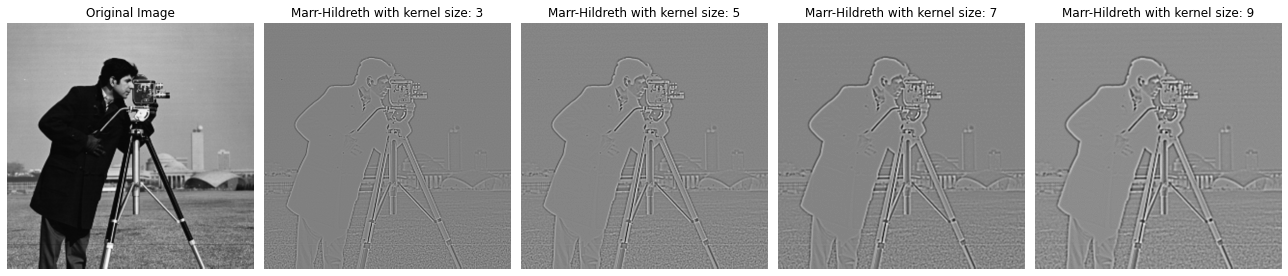

In [273]:
kernel_size = [3,5,7,9]

marrHildrethImages = [image]
marrTitles = ['Original Image']

for i in kernel_size : 
    # Finding the Laplacian of Gaussian
    gaussian = cv2.GaussianBlur(grayscale_image, (i,i), 0)
    laplacian = cv2.Laplacian(gaussian, cv2.CV_16S)

    marrHildrethImages.append(laplacian)
    marrTitles.append("Marr-Hildreth with kernel size: " + str(i))

    if i == 5: 
        cv2.imwrite("./output/t3a.tif", laplacian)




plt.figure(figsize=(18, 6))

for idx, (img, title) in enumerate(zip(marrHildrethImages, marrTitles)):
    plt.subplot(1, 5, idx + 1)
    plt.imshow(img, cmap ='gray')
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

<h2>Task 3.B - Canny Edge detection</h2>

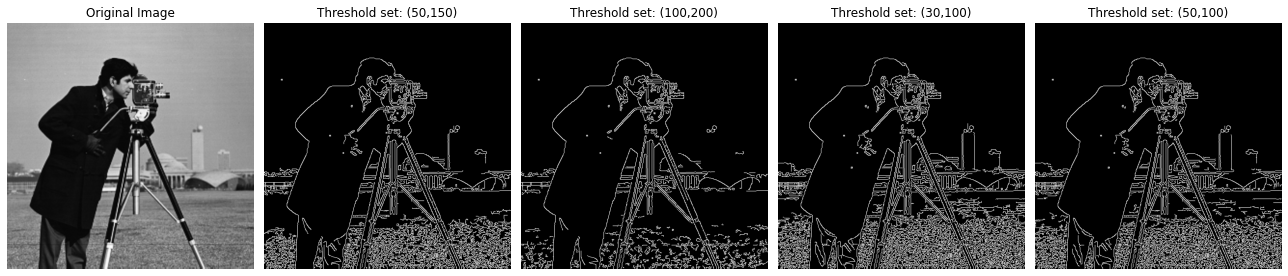

In [274]:
threshold_set = [
    [50, 100, 30, 50],
    [150, 200, 100, 100]
]

canny_images = [image]
cannyTitles = ['Original Image']

for i in range(len(threshold_set[0])):
    canny_edges = cv2.Canny(image, threshold_set[0][i], threshold_set[1][i])

    canny_images.append(canny_edges)
    cannyTitles.append("Threshold set: (" + str(threshold_set[0][i]) + "," + str(threshold_set[1][i]) + ")")

    if i == 1:
        cv2.imwrite("./output/t3b.tif", canny_edges)

plt.figure(figsize=(18, 6))
for idx, (img, title) in enumerate(zip(canny_images, cannyTitles), 1):
    plt.subplot(1,5, idx) 
    plt.imshow(img, cmap = 'gray')
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

<h1>Task 4</h1>

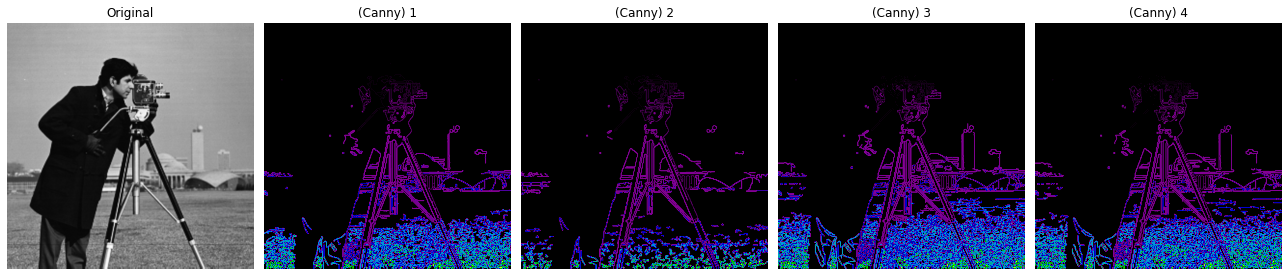

In [275]:
def is_foreground_pixel(pixel):
    return pixel != 0  

# 8 connected 
def get_neighbors(coord, height, width):
    i, j = coord
    # formular for the surrounding edges 
    neighbors = [(x, y) for x, y in [(i-1, j), (i+1, j), (i, j-1), (i, j+1),
                                     (i-1, j-1), (i-1, j+1), (i+1, j-1), (i+1, j+1)]  
                 if 0 <= x < height and 0 <= y < width]
    return neighbors


def connected_components_labeling(image):
    # Step 1: initialize curlab and output
    output = np.zeros_like(image, dtype=int)
    curlab = 1

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Step 2: check foreground pixel
            if is_foreground_pixel(image[i][j]) and output[i][j] == 0:
                queue = []
                queue.append((i, j))
                output[i][j] = curlab

                # Step 3: check neighbor pixel
                while queue:
                    x, y = queue.pop(0)
                    for neighbor_x, neighbor_y in get_neighbors((x, y), image.shape[0], image.shape[1]):
                        if is_foreground_pixel(image[neighbor_x][neighbor_y]) and output[neighbor_x][neighbor_y] == 0:
                            output[neighbor_x][neighbor_y] = curlab
                            queue.append((neighbor_x, neighbor_y))
                curlab += 1
    return output

canny = [image]
canny_title = ["Original"]
for i in range(1, len(canny_images)): 
    labeled_img = connected_components_labeling(canny_images[i])
    canny.append(labeled_img)
    canny_title.append("(Canny) " + str(i))

cv2.imwrite("./output/t4b.tif", canny[2])

# Visualization
plt.figure(figsize=(18, 6))
for idx, (img, title) in enumerate(zip(canny, canny_title), 1):
    plt.subplot(1,5, idx) 
    plt.imshow(img, cmap ='nipy_spectral')
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

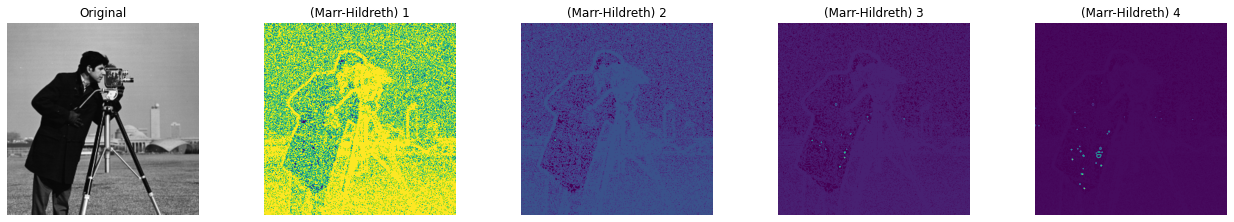

In [276]:

marrHil = [image]
marrHil_title = ["Original"]
for i in range(1, len(canny_images)): 
    labeled_img = connected_components_labeling(marrHildrethImages[i])
    marrHil.append(labeled_img)
    marrHil_title.append("(Marr-Hildreth) " + str(i))

cv2.imwrite("./output/t4a.tif", canny[1])

# Visualization
plt.figure(figsize=(18, 6))
for idx, (img, title) in enumerate(zip(marrHil, marrHil_title), 1):
    plt.subplot(2,5, idx) 
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()